<!--NOTEBOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="./figures/LogoOpenclassrooms.png">
<font size="4">
<p>
Cette étude a été réalisée dans le cadre du 5ème projet de ma formation Datascientist dispensée en MOOC par 
**<font color='blus'>Openclassrooms / écoles Centrale-Supélec</font>**.
</p>    

<p>
Le modèle étudié se base sur les données fournies par le site :
</p>
<p>
https://archive.ics.uci.edu/ml/datasets/Online+Retail
</p>
<p>

<p>
Ce notebook présente l'analyse des nouvelles features issues de la colonne ``InvoiceDate`` du dataset.
</p>

<p>
Ce notebook implémente les phases de l'analyse exploratoire de la façon suivante :
</p>
* l'acquisition des données issues du sampling réalisé dans le notebook ``P5_2.ipynb``
* les phases de création de ces données temporelles
* l'analyse exploratoire de ces nouvelles données    
* l'analyse et l'évaluation du clustering de ces données    

**Les résultats de cette analyse sont reprise dans le notebook <font color='blue'>*P5_AllFeature.ipynb*</font>**. 

Ce dernier notebook permet d'évaluer les différents modèles de prédiction.

In [4]:
import pandas as pd
import numpy as np
import time

import warnings
warnings.filterwarnings("ignore")


import p3_util
import p3_util_plot
import p5_util
import p5_util_plot

#--------------------------
# Process flow parameters
#--------------------------
is_reloaded = True

#---------------------------------------------------------------------------
# Outliers values issued from Total feature are removed or not from dataset.
is_total_no_outliers = False
#---------------------------------------------------------------------------

#---------------------------------------------------------------------------
# Encoded RFM features are clusterized separatly from other features.
#---------------------------------------------------------------------------
is_rfm_cluster = True

#### <font color='blue'>Restore *df_invoice_line* dataframe</font>

In [5]:
import p5_util
if is_reloaded is True:
    df_invoice_line =  p5_util.p5_reload_data_sample()
    print(df_invoice_line.shape)    

p5_util.object_load : fileName= ./data/df_invoice_line_sample_random.dump
(194907, 7)
(194907, 7)


In [6]:
if is_reloaded is True:
    df_invoice_line.shape

In [7]:
nb_invoices = len(df_invoice_line['InvoiceNo'].unique())
print("\n*** Nombre de factures= "+str(nb_invoices))


*** Nombre de factures= 9330


In [8]:
nb_customers = len(df_invoice_line['CustomerID'].unique())
print("\n*** Nombre de clients= "+str(nb_customers))


*** Nombre de clients= 2124


# <font color='blus'>Building features from *InvoiceDate* colummn</font>

In [9]:
import p5_util
list_new_feature = ['month','day','dow','pod']
p5_util.time_list_feature_build(df_invoice_line, list_new_feature)

is_built_step : True
Time feature : month --> (2124, 12)
is_built_step : True
Time feature : day --> (2124, 31)
is_built_step : True
Time feature : dow --> (2124, 6)
is_built_step : True
Time feature : pod --> (2124, 2)


({'day': OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
         handle_unknown='error', n_values='auto', sparse=True),
  'dow': OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
         handle_unknown='error', n_values='auto', sparse=True),
  'month': OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
         handle_unknown='error', n_values='auto', sparse=True),
  'pod': OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
         handle_unknown='error', n_values='auto', sparse=True)},
 Empty DataFrame
 Columns: []
 Index: [])

####  Restore time based features into an aggregated  dataframe

In [10]:
import p5_util
list_new_feature = ['month','day','dow','pod']

df_cust_time_feature, std_scale = p5_util.time_list_feature_restore(list_new_feature)
print(df_cust_time_feature.shape)
df_cust_time_feature.sample(1)

p5_util.object_load : fileName= ./data/df_customers_month.dump
p5_util.object_load : fileName= ./data/df_customers_day.dump
p5_util.object_load : fileName= ./data/df_customers_dow.dump
p5_util.object_load : fileName= ./data/df_customers_pod.dump
(2124, 51)


,w_month_0,w_month_1,w_month_2,w_month_3,w_month_4,w_month_5,w_month_6,w_month_7,w_month_8,w_month_9,...,w_day_29,w_day_30,w_dow_0,w_dow_1,w_dow_2,w_dow_3,w_dow_4,w_dow_5,w_pod_0,w_pod_1
CustomerID,,,,,,,,,,,,,,,,,,,,,
14195,-0.276565,-0.277841,-0.321879,-0.027448,-0.21324,-0.293989,-0.251089,-0.266494,-0.320354,-0.347423,...,-0.232023,-0.146899,-0.309756,-0.313783,-0.287361,-0.362638,-0.182454,-0.24555,-0.362092,-0.102301


#### Backup dataframe into a dumped file

In [11]:
import p5_util
fileName = './data/df_cust_timeFeature.dump'
p5_util.object_dump(df_cust_time_feature, fileName)

In [12]:
df_cust_time_feature.shape

(2124, 51)

# <font color='blus'> PCA time features</font>

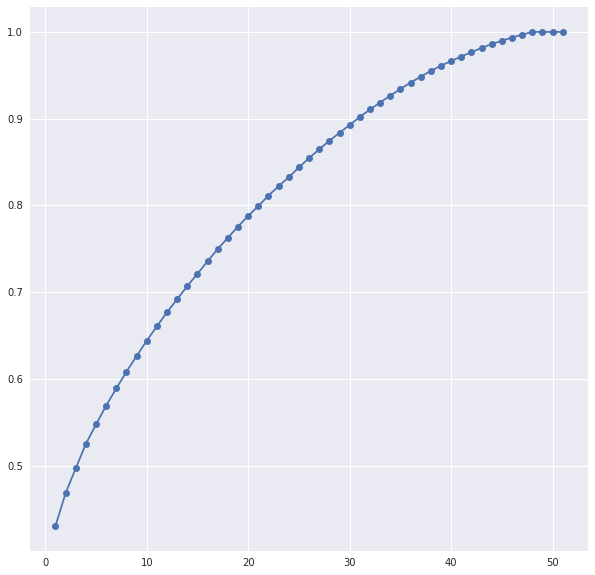

In [13]:
import p3_util_plot
z__ = p3_util_plot.df_pca_all_plot(df_cust_time_feature, plot=True)

#### 30 features allows to explain 90% of the total variance

In [14]:
df_cust_time_feature.sample(1)

,w_month_0,w_month_1,w_month_2,w_month_3,w_month_4,w_month_5,w_month_6,w_month_7,w_month_8,w_month_9,...,w_day_29,w_day_30,w_dow_0,w_dow_1,w_dow_2,w_dow_3,w_dow_4,w_dow_5,w_pod_0,w_pod_1
CustomerID,,,,,,,,,,,,,,,,,,,,,
15448,1.463397,-0.277841,-0.321879,-0.298859,-0.30238,-0.293989,-0.251089,-0.266494,-0.320354,-0.347423,...,-0.232023,2.576413,0.316793,-0.313783,-0.287361,-0.362638,-0.306871,-0.281034,-0.271157,-0.102301


In [15]:
import p5_util

print(df_cust_time_feature.shape)
n_dim=30
root_name = 'time_pca_'
df_cust_time_feature.CustomerID = df_cust_time_feature.index
df_cust_time_feature, pca_timeFeature = p5_util.df_pca_reduce(df_cust_time_feature\
                                                                 , n_dim, root_name, p_is_scale=False)
print(df_cust_time_feature.shape)


(2124, 51)
(2124, 30)


#### Backup dumped file 

In [16]:
import p5_util
fileName = './data/df_customers_timeFeature_pca.dump'
p5_util.object_dump(df_cust_time_feature, fileName)

# <font color='blus'> Clustering time features</font>

#### Loading dumped file into *df_customers* dataframe

In [17]:
is_reloaded

True

In [18]:
import p5_util
if is_reloaded is True:
    fileName = './data/df_customers_timeFeature_pca.dump'
    df_customers = p5_util.object_load(fileName)
    print(df_customers.shape)

p5_util.object_load : fileName= ./data/df_customers_timeFeature_pca.dump
(2124, 30)


## <font color='blue'> Kmeans Clustering time features</font>

In [19]:
import p5_util
cluster_start = 1
cluster_end = 11
dict_kmeans = p5_util.kmeans_scan_inter_inertia(df_customers, cluster_start, cluster_end)

Clustering : 1 clusters
Clustering : 2 clusters
Clustering : 3 clusters
Clustering : 4 clusters
Clustering : 5 clusters
Clustering : 6 clusters
Clustering : 7 clusters
Clustering : 8 clusters
Clustering : 9 clusters
Clustering : 10 clusters


#### Save of Kmeans clustering scan from time features into a dumped file

In [20]:
import p5_util

fileName = './data/clustering_dict_kmeans_timeFeature.dump'
p5_util.object_dump(dict_kmeans, fileName)

#### Time features : Plot Clusters = F(inter-inertia)

p5_util.object_load : fileName= ./data/clustering_dict_kmeans_timeFeature.dump
Records into Time feaures dict_kmeans= 10
1 10


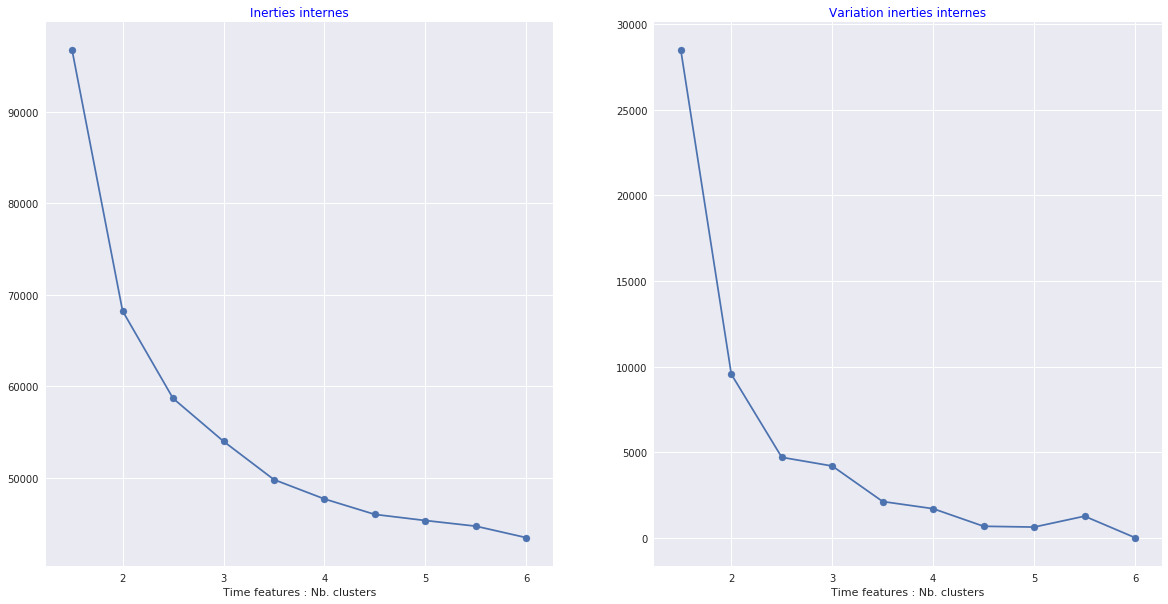

In [21]:
import p5_util_plot
import p5_util

if is_reloaded is True:
    fileName = './data/clustering_dict_kmeans_timeFeature.dump'
    dict_kmeans = p5_util.object_load(fileName)
    print("Records into Time feaures dict_kmeans= "+str(len(dict_kmeans)))

x_label_0 = 'Time features : Nb. clusters'
x_label_1 = 'Time features : Nb. clusters'
cluster_start = list(dict_kmeans.keys())[0]
cluster_end = list(dict_kmeans.keys())[len(dict_kmeans)-1]
print(cluster_start, cluster_end)
p5_util_plot.plot_kmeans_interInertia(dict_kmeans, cluster_start, cluster_end\
                             ,[x_label_0, x_label_1]\
                             ,p_rows=1, p_cols=2, p_figsize=(20,10))

#### Clustering : Time features silhouette

In [22]:
import p5_util
import p5_util_plot

if True:
    fileName = './data/df_customers_timeFeature_pca.dump'
    df_customers = p5_util.object_load(fileName)
    print("Time features : "+str(df_customers.shape))
    
    #-------------------------------------------------------------------------------
    # Use kmeans dictionary to get numbers of clusters
    #-------------------------------------------------------------------------------
    fileName = './data/clustering_dict_kmeans_timeFeature.dump'
    dict_kmeans = p5_util.object_load(fileName)
    print("Clusters into Times features dict_kmeans= "+str(len(dict_kmeans)))
    cluster_start = list(dict_kmeans.keys())[0]
    cluster_end = list(dict_kmeans.keys())[len(dict_kmeans)-1]
    print("Cluster start = "+str(cluster_start)+" Cluster end= "+str(cluster_end))


dict_cluster_kmeans_silhouette = p5_util.kmeans_scan_silhouette(df_customers, cluster_start, cluster_end)

p5_util.object_load : fileName= ./data/df_customers_timeFeature_pca.dump
Time features : (2124, 30)
p5_util.object_load : fileName= ./data/clustering_dict_kmeans_timeFeature.dump
Clusters into Times features dict_kmeans= 10
Cluster start = 1 Cluster end= 10
Cluster 2 done!
Cluster 3 done!
Cluster 4 done!
Cluster 5 done!
Cluster 6 done!
Cluster 7 done!
Cluster 8 done!
Cluster 9 done!


#### Backup silhouette clustering result

In [23]:
import p5_util
fileName = './data/dict_cluster_kmeans_silhouette_TimeFeatures.dump'
p5_util.object_dump(dict_cluster_kmeans_silhouette,fileName)

#### Plotting silhouette = F(nb clusters)

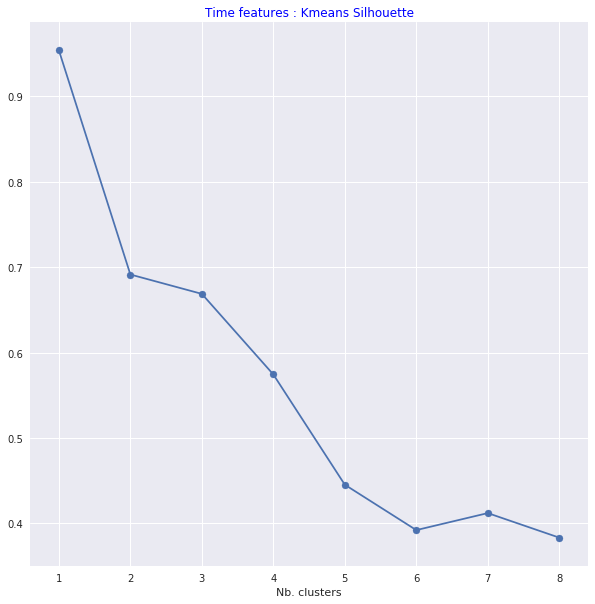

In [24]:
p_title='Time features : Kmeans Silhouette'
p5_util_plot.plot_kmeans_silhouette(dict_cluster_kmeans_silhouette, p_title, p_figsize=(10,10))

### <font color='blue'>Cluster model with best number of clusters</font>

In [25]:
n_cluster=2

In [26]:
from sklearn.cluster import KMeans
from sklearn import metrics
X = df_customers.values

#csr_invoice_matrix = sparse.csr_matrix(df_RFM_encoded.values)
cluster_kmean = KMeans(n_clusters=n_cluster).fit(X)

# Predict the cluster for each data point
preds_kmean = cluster_kmean.predict(X)

### <font color='blue'>Adding *cluster* issue fro clustering into *df_customers*  as a new feature</font>

In [27]:
if 'cluster' in df_customers.columns:
    del(df_customers['cluster'])
df_customers.shape,preds_kmean.shape

((2124, 30), (2124,))

In [28]:
import p5_util

print(df_customers.shape)
df_customers = p5_util.df_add_cluster(df_customers, preds_kmean)
print(df_customers.shape)

(2124, 30)
(2124, 31)


In [29]:
df_customers.columns

Index(['cluster', 'time_pca_0', 'time_pca_1', 'time_pca_2', 'time_pca_3',
       'time_pca_4', 'time_pca_5', 'time_pca_6', 'time_pca_7', 'time_pca_8',
       'time_pca_9', 'time_pca_10', 'time_pca_11', 'time_pca_12',
       'time_pca_13', 'time_pca_14', 'time_pca_15', 'time_pca_16',
       'time_pca_17', 'time_pca_18', 'time_pca_19', 'time_pca_20',
       'time_pca_21', 'time_pca_22', 'time_pca_23', 'time_pca_24',
       'time_pca_25', 'time_pca_26', 'time_pca_27', 'time_pca_28',
       'time_pca_29'],
      dtype='object')

### <font color='blue'>Showing elements count per cluster</font>

Clusters = [0 1]
Population cumulée par cluster = 2124
         Count
cluster       
0         2122
1            2


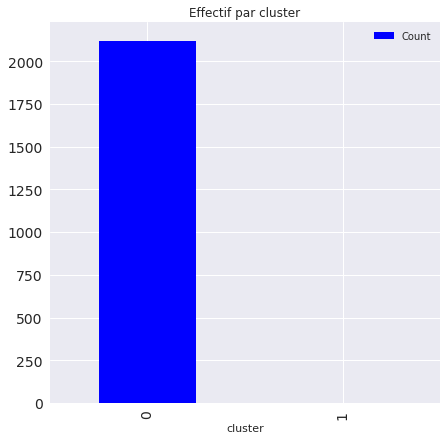

In [30]:
import p5_util_plot
p5_util_plot.plot_cluster_frequency(df_customers)

## <font color='blue'> DBSCAN clustering</font>

#### Distances distribution

In [31]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

if 'cluster' in df_customers.columns:
    del(df_customers['cluster'])
    
distances = pdist(df_customers.values, metric='euclidean')

print(np.min(distances), np.max(distances))



x_med = np.median(distances)
print("Distance median = "+str(x_med))
print("Nb elts de distances= "+str(len(distances)))
len(np.where(distances<x_med)[0])

raws = df_customers.shape[0]
print("Distance elts computing : n*(n+1)/2 - n = "+str(int((raws*(raws+1)/2)-raws)))

df_dist = pd.DataFrame(distances)

df_dist_quantiles = df_dist.quantile(q=[0.15, 0.25 ,0.5, 0.75, 0.95])

df_dist_quantiles.rename(columns={0:'Distance'},inplace=True)
df_dist_quantiles

0.0 156.69397618522703
Distance median = 4.251861177452584
Nb elts de distances= 2254626
Distance elts computing : n*(n+1)/2 - n = 2254626


,Distance
0.15,1.804062
0.25,2.458834
0.50,4.251861
0.75,7.008467
0.95,14.738873


In [32]:
p_eps=7.0

#### Computing nb neighbours for 95% fo distances

In [33]:
import numpy as np

dist_matrix = squareform(distances)
print(dist_matrix.shape)
dict_ball_neighbour = dict()
for raw in range(0,dist_matrix.shape[0]):
    dict_ball_neighbour[raw] = len(np.where(dist_matrix[raw]<= p_eps)[0])

(2124, 2124)


In [34]:
ser_ball_neighbour = pd.Series(dict_ball_neighbour)
ser_neighbour_quantiles = ser_ball_neighbour.quantile(q=[0.15, 0.25 ,0.5, 0.75, 0.95, 1.0])
ser_neighbour_quantiles

0.15    1552.90
0.25    1787.75
0.50    1850.00
0.75    1855.00
0.95    1860.00
1.00    1888.00
dtype: float64

### DBSCAN clustering

In [35]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=p_eps,min_samples=3500, n_jobs=3)
if 'cluster' in df_customers.columns:
    del(df_customers['cluster'])
pred_dbscan =  dbscan.fit_predict(df_customers)

import numpy as np
np.unique(pred_dbscan)

array([-1], dtype=int32)

(2124, 30)
(2124, 31)
Clusters = [-1]
Population cumulée par cluster = 2124
         Count
cluster       
-1        2124


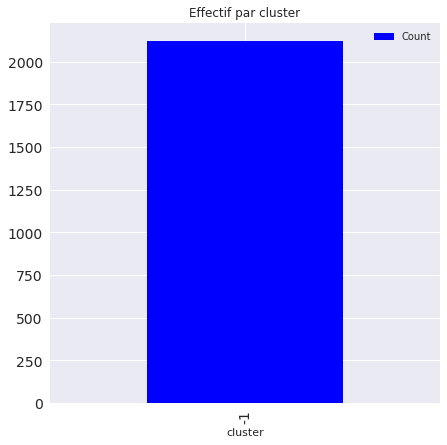

In [36]:
import p5_util
import p5_util_plot

print(df_customers.shape)
df_customers = p5_util.df_add_cluster(df_customers, pred_dbscan)
print(df_customers.shape)
p5_util_plot.plot_cluster_frequency(df_customers)

## <font color='blue'>GMM clustering</font>

#### Restore dataframe with reduced dimensions per customer and encoded values

In [37]:
import p5_util

if is_reloaded is True:
    fileName = './data/df_customers_timeFeature_pca.dump'
    df_customers = p5_util.object_load(fileName)
    print(df_customers.shape)

if 'cluster' in df_customers.columns:
    del(df_customers['cluster'])
print(df_customers.shape)    

p5_util.object_load : fileName= ./data/df_customers_timeFeature_pca.dump
(2124, 30)
(2124, 30)


#### Clustering to search for from a given range 

In [38]:
cluster_start = 1
cluster_end = 11

#### GMM clustering evaluation : using BIC and AIC criterias
* AIC : provides a measure of statistical quality model. It measures loss of information (increase of entropy)  when multiple models are suggested, models with increaing complexity.
* BIC : comes from AIC

Goal : minimisation of both criterias

#### Cross-validation of GMM hyper-parameter : covariance type.

In [39]:
import p5_util
dict_hyper_parameter={'covariance_type':['diag','spherical','full']}
t_range_cluster = (cluster_start, cluster_end)
dict_list_gmm_model = p5_util.gmm_hyper_parameter_cv(df_customers, t_range_cluster ,dict_hyper_parameter)

Clustering from clusters range from : 1 --> 11
GMM Hyper-parameter type= covariance_type
Hyper parameter value : diag
Hyper parameter value : spherical
Hyper parameter value : full


#### Display AIC and BIC considering clusters number

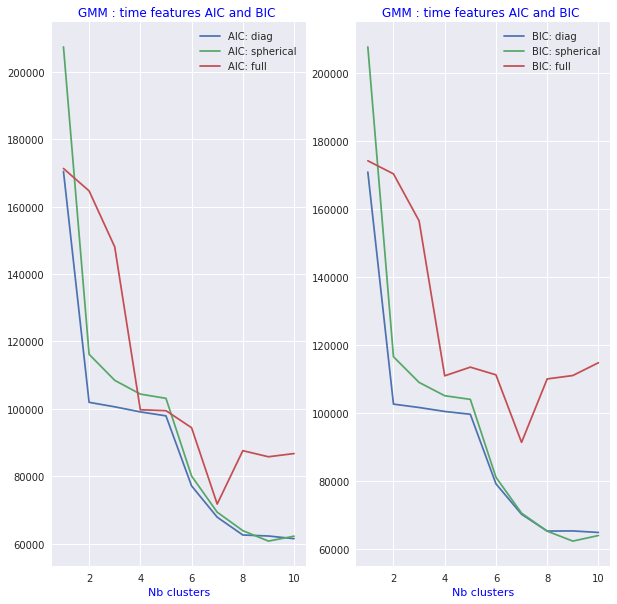

In [40]:
import p5_util_plot
p_figsize = (10,10)
t_range_cluster = (cluster_start, cluster_end)
p_title = 'GMM : time features AIC and BIC '
p5_util_plot.gmm_models_plot_AIC_BIC(df_customers, dict_list_gmm_model, t_range_cluster, p_figsize, p_title)

#### <font color='green'>Loss of information is optimized for cluster = 3</font>

#### GMM models evaluation:  computation of silhouette score

In [41]:
import p5_util
dict_dict_silhouette_score = p5_util.gmm_silhouette_compute(df_customers, dict_list_gmm_model)


GMM Silhouette score: Hyper-parameter = diag
GMM Silhouette score: Cluster= 2
GMM Silhouette score: Cluster= 3
GMM Silhouette score: Cluster= 4
GMM Silhouette score: Cluster= 5
GMM Silhouette score: Cluster= 6
GMM Silhouette score: Cluster= 7
GMM Silhouette score: Cluster= 8
GMM Silhouette score: Cluster= 9
GMM Silhouette score: Cluster= 10

GMM Silhouette score: Hyper-parameter = spherical
GMM Silhouette score: Cluster= 2
GMM Silhouette score: Cluster= 3
GMM Silhouette score: Cluster= 4
GMM Silhouette score: Cluster= 5
GMM Silhouette score: Cluster= 6
GMM Silhouette score: Cluster= 7
GMM Silhouette score: Cluster= 8
GMM Silhouette score: Cluster= 9
GMM Silhouette score: Cluster= 10

GMM Silhouette score: Hyper-parameter = full
GMM Silhouette score: Cluster= 2
GMM Silhouette score: Cluster= 3
GMM Silhouette score: Cluster= 4
GMM Silhouette score: Cluster= 5
GMM Silhouette score: Cluster= 6
GMM Silhouette score: Cluster= 7
GMM Silhouette score: Cluster= 8
GMM Silhouette score: Cluster= 

#### Plot silhouette score for any type of covariance and for any type of GMM model

* For each covariance type (spherical, diag and full), GMM models ranking from *cluster_start* to *cluster_end* have been built

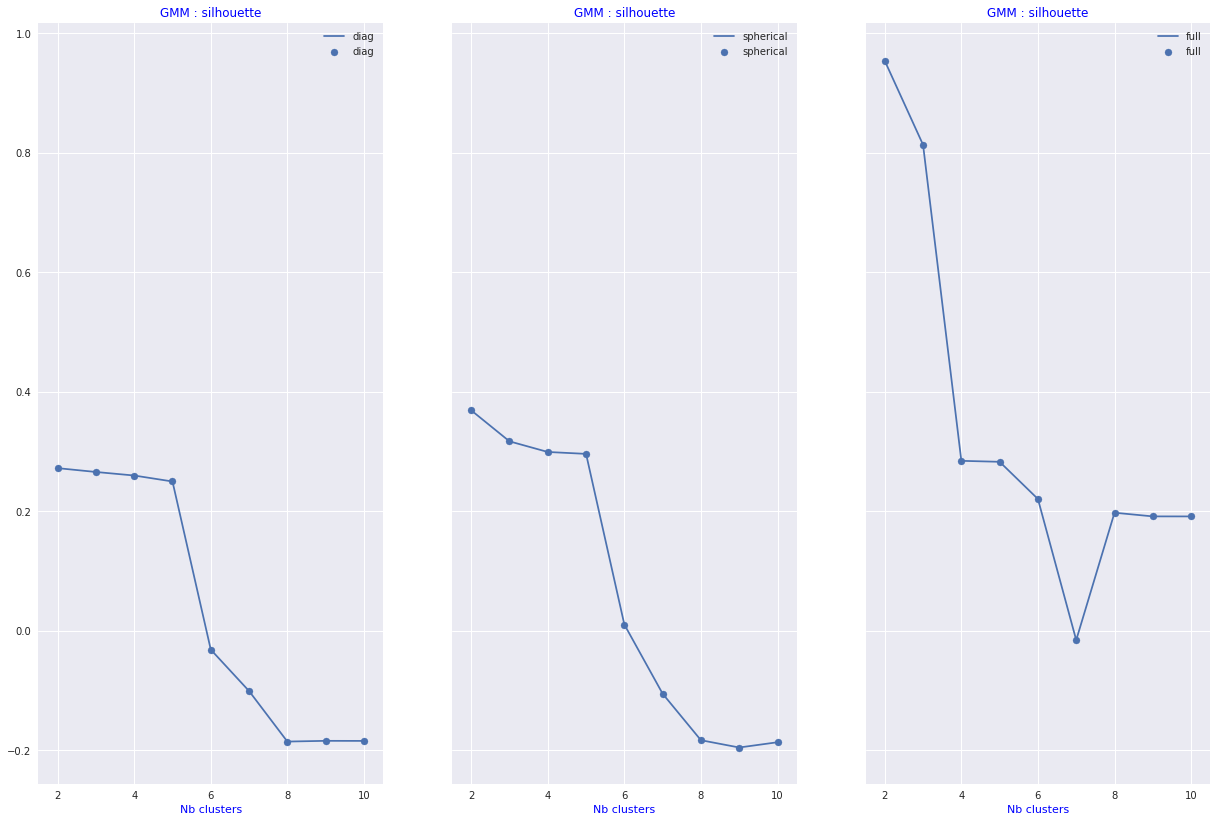

In [42]:
import p5_util_plot
p_figsize=(21,14)
areas_raws =1
areas_colums =3
p_title = "GMM : silhouette"
p5_util_plot.gmm_models_plot_silhouette(df_customers, dict_dict_silhouette_score\
, p_figsize, p_title, areas_raws, areas_colums)

#### Selection of best clusters count with optimum covariance type

In [43]:
p_covariance_type = 'diag'
n_cluster = 4
list_gmm_model = dict_list_gmm_model[p_covariance_type]
for gmm_model in list_gmm_model:
    if n_cluster == gmm_model.n_components:
        break
gmm_model

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
        means_init=None, n_components=4, n_init=1, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

(2124, 30)
(2124, 31)
Clusters = [0 1 2 3]
Population cumulée par cluster = 2124
         Count
cluster       
0         1183
1            1
2          939
3            1


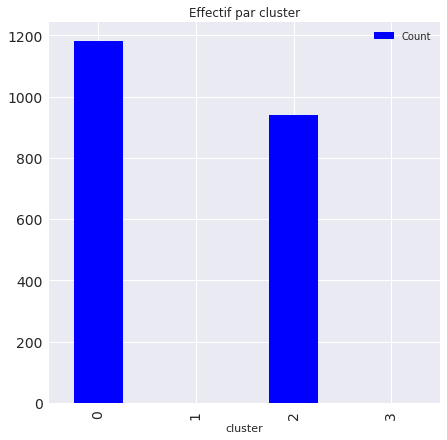

In [44]:
import p5_util
import p5_util_plot
if 'cluster' in df_customers.columns:
    del(df_customers['cluster'])
    
pred_gmm = gmm_model.predict(df_customers.values)
print(df_customers.shape)
df_customers = p5_util.df_add_cluster(df_customers, pred_gmm)
print(df_customers.shape)
p5_util_plot.plot_cluster_frequency(df_customers)

In [45]:
df_customers.sample()

,cluster,time_pca_0,time_pca_1,time_pca_2,time_pca_3,time_pca_4,time_pca_5,time_pca_6,time_pca_7,time_pca_8,...,time_pca_20,time_pca_21,time_pca_22,time_pca_23,time_pca_24,time_pca_25,time_pca_26,time_pca_27,time_pca_28,time_pca_29
CustomerID,,,,,,,,,,,,,,,,,,,,,
13827,2,0.159591,-0.357518,-0.966049,0.768561,1.071325,-0.449575,-0.653663,-1.494952,0.152031,...,-0.210729,-1.030475,-0.325405,-0.261883,-0.764185,-0.981062,-0.351794,0.152829,0.553572,-0.213526


In [46]:
import p5_util
fileName = './data/pred_gmm_timeFeature.dump'
p5_util.object_dump(df_customers, fileName)